In [15]:
# Importing necessary libraries
import os
import random
import gc
import matplotlib.pyplot as plt
import numpy as np

from simulation.graph_utils import convert_maze, load_graph, get_starting_node
from simulation.simulation import Algorithm, Simulation


def calculate_stats(data):
    """Calculates the average and standard deviation of a given list of data."""
    if len(data) > 1:
        avg = np.mean(data)
        std_dev = np.std(data)
    else:
        avg = 0
        std_dev = 0
    return avg, std_dev


def simulate_graph_exploration_multiple(
    algorithm: Algorithm,
    graphs_path: str,
    num_agents: int
):
    """Simulates the graph exploration for all graphs in the specified folder."""
    agent_steps = []
    agent_pioneer_steps = []
    fraction_explored = []
    fraction_pioneer_explored = []

    # Iterate over all graph files in the specified directory
    for root, _, files in os.walk(graphs_path):
        for file in files:
            graph_path = os.path.join(root, file)
            if not graph_path.endswith(".graphml"):
                continue  # Skip files that are not .graphml

            # Load the graph
            graph = load_graph(graph_path)
            node_example = random.choice(list(graph.nodes))
            starting_node_id = get_starting_node(node_example)

            # Run the simulation
            simulation = Simulation(
                algorithm=algorithm,
                n_agents=num_agents,
                graph=graph,
                starting_node_id=starting_node_id,
            )

            # Simulate graph exploration
            simulation.simulate(False, False)

            # Collect metrics
            agent_steps.append(simulation.total_steps / num_agents if num_agents > 0 else 0)
            agent_pioneer_steps.append(simulation.pioneer_steps)
            fraction_explored.append(simulation.fraction_explored * 100)
            fraction_pioneer_explored.append(simulation.fraction_pioneer * 100)

            # Free memory after simulation
            del simulation
            del graph
            gc.collect()

    # Return aggregated metrics
    return agent_steps, agent_pioneer_steps, fraction_explored, fraction_pioneer_explored


def plot_histograms( fraction_pioneer_explored):
    """Generates histograms for the collected metrics."""
    avg_fraction_pioneer, std_fraction_pioneer = calculate_stats(fraction_pioneer_explored)

    # Print the calculated statistic

    print("Statistics for Fraction of Graph Explored by Pioneer:")
    print(f"Mean: {avg_fraction_pioneer:.2f}%, Std Dev: {std_fraction_pioneer:.2f}%\n")

    # Plot histogram for fraction explored by pioneer
    plt.figure(figsize=(10, 6))
    plt.hist(fraction_pioneer_explored, bins=50, color='blue', alpha=0.7, label='Fraction Explored when Pioneer arrives (%)')
    plt.xlabel('Fraction Explored by Pioneer (%)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Fraction of Graph Explored when Pioneer arrives')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
# Example usage
algorithm = Algorithm.TARRY # Specify the algorithm to use
graphs_path = "graphs/random_unlabeled_tree/1500"  # Directory containing the graphs
num_agents = 20  # Set the number of agents

# Simulate the graph exploration for all graphs in the specified folder
(agent_steps, agent_pioneer_steps, 
 fraction_explored, fraction_pioneer_explored) = simulate_graph_exploration_multiple(
    algorithm, graphs_path, num_agents
)

250
Statistics for Fraction of Graph Explored by Pioneer:
Mean: 48.55%, Std Dev: 30.06%



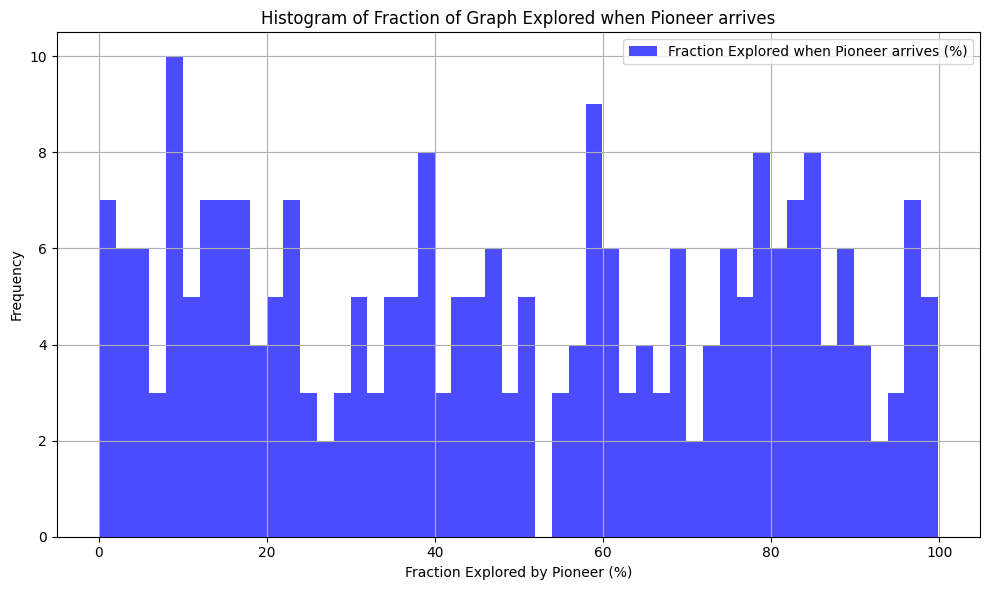

In [16]:
print(len(fraction_pioneer_explored))

# Plot the histograms for the collected metrics
plot_histograms(fraction_pioneer_explored)